<a href="https://colab.research.google.com/github/denrafli/UAS-DATA-ANALYTICS/blob/main/clustering_with_pca_kmeans_hierarchical_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I tried to analyze country profiling data using various clustering techniques. The following four types of unsupervised techniques are used:
* PCA Decomposition (Dimensionality Reduction)
* K-Means Clustering (Centroid Based) Clustering
* Hierarchical (Divisive and Agglomerative) Clustering
* DBSCAN (Density Based) Clustering

# Importing Data

In [ ]:
import pandas as pd
data = pd.read_csv('https://drive.google.com/file/d/1hBQlymLMrcc2Pw9PVr3MSMyFyxQiKHmb/view?usp=sharing')

Let's check the contents of data

In [ ]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [ ]:
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

What do the column headings mean? Let's check the data dictionary.

In [ ]:
import pandas as pd
data_dict = pd.read_csv('https://drive.google.com/file/d/1GGWOzkGRY1NhPUGREgil_zyIAgKx-F3k/view?usp=sharing')
data_dict.head(10)

<!DOCTYPE html><html><head><meta name="google" content="notranslate"><meta http-equiv="X-UA-Compatible" content="IE=edge;"><style nonce="k2p3mdZNZq0f9M60PYjcuw">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name="referrer" content="origin"><title>data-dictionary.csv - Google Drive</title><meta property="og:title" content="data-dictionary.csv"><meta property="og:type" content="article"><meta property="og:site_name" content="Google Docs"><meta property="og:url" content="https://drive.google.com/file/d/1GGWOzkGRY1NhPUGREgil_zyIAgKx-F3k/view?usp=sharing&amp;usp=embed_facebook"><link rel="shortcut icon" href="https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png"><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Google+Sans:300  \
0                                               try{                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1                                             var la                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

# Analyzing Data

In [ ]:
#Data analysis baseline library
!pip install dabl

     |████████████████████████████████| 559 kB 5.4 MB/s 
  Created wheel for dabl: filename=dabl-0.1.8-py3-none-any.whl size=565074 sha256=a3c7ab4e7b3df6b6e2b1d65287cf156d0752b1a0952d585c4f239b033af27a18
  Stored in directory: /root/.cache/pip/wheels/76/ab/fe/ba8715c1dbee08327ef56259f0f774fff9c6f84a112f329280
Successfully built dabl
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


We are using Data Analysis Baseline Library here. It will help us analyze the data with respect to the target column.

Target looks like regression


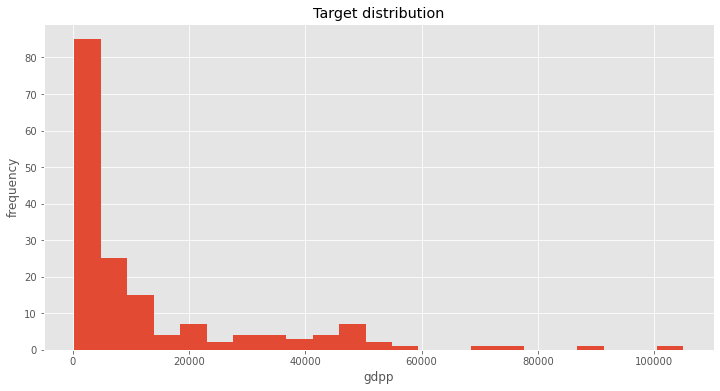

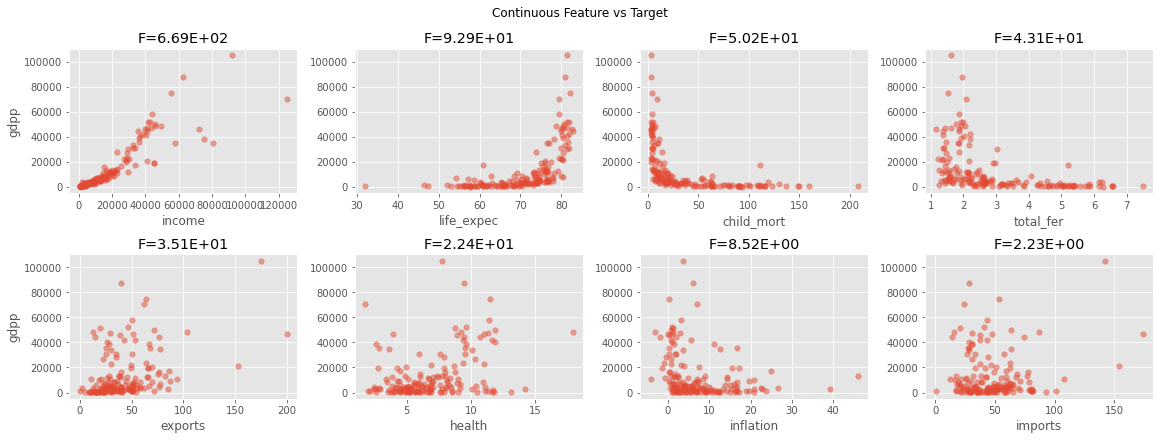

In [ ]:
import dabl
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
dabl.plot(data, target_col = 'gdpp')

We can observe very close positive correlation between "Income" and "GDPP". Also, "Exports", "Imports", "Health" have sort of positive correlation with "GDPP".

However, we will now drop the column "Country" not because it is the only categorical (object type) parameter, but because it is not a deciding parameter to keep/not-keep a particular record within a cluster. In short, "Country" is a feature which is not required here for unsupervised learning.

In [ ]:
# Exclude "Country" column
data = data.drop('country', axis=1)

KeyError: ignored

We will use simple profile reporting where we can get an easy overview of variables, and we can explore interactions (pair-wise scatter plots), correlations (Pearson's, Spearman's, Kendall's, Phik), missing value information - all in one place. The output it produces is a bit long though, and we need to scroll down and toggle different tabs to view all the results, but the time you spend on it is worth it.

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function() {
    return False;
}

<IPython.core.display.Javascript object>

In [ ]:
import pandas_profiling as profile
profile.ProfileReport(data)

**Gist of Overview:**
* Average death of children under age 5 in every 100 people: 38.27
* Average life expectancy: 70.56 (highly negatively skewed distribution)
* Health has a perfectly symmetric distribution with mean 6.82 
* Average exports of goods and services per capita: 41.11
* Average imports of goods and services per capita: 46.89 (which is > avg. exports)
* Average net income per person: 17144.69 (highly positively skewed distribution)
* Average inflation: 7.78 (has a wide spread ranging from min -4.21 till +104)
* Average GDP per capita: 12964.15 (highly negatively skewed distribution)

**Gist of Interactions:**
* Child Mortality has a perfect negative correlation with Life Expectancy
* Total Fertility has somewhat positive correlation with Child Mortality
* Exports and Imports have rough positive correlation
* Income and GDPP have fairly positive correlation

**Gist of Missing Values:**
* There is no missing value in data

We will discuss correlation coefficients in detail later.

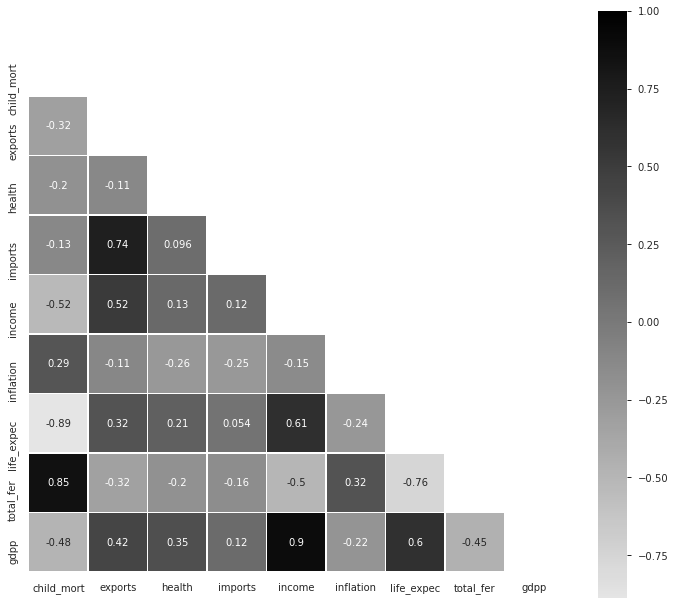

In [ ]:
#More prominent correlation plot
import numpy as np
import seaborn as sns
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.light_palette('black', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

**Insights from Pearson's Correlation Coefficient Plot :**

* Imports have high positive correlation with Exports (+0.74)
* Income has fairly high positive correlation with Exports (+0.52)
* Life Expectancy has fairly high positive correlation with Income (+0.61)
* Total Fertility has very high positive correlation with Child Mortality (+0.85)
* GDPP has very high positive correlation with Income (+0.90)
* GDPP has fairly high positive correlation with Life Expectancy (+0.60)
* Total Fertility has fairly high negative correlation with Life Expectancy (-0.76) - Well, I found this particular thing as an interesting insight but let's not forget **"Correlation does not imply causation"!**

# (1) Principal Component Analysis

Principal Component Analysis (PCA) is a popular technique for deriving a set of low dimensional features from a large set of variables. Sometimes reduced dimensional set of features can represent distinct no. of groups with similar characteristics. Hence PCA can be an insightful clustering tool (or a preprocessing tool before applying clustering as well). We will standardize our data first and will use the scaled data for all clustering works in future.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data)

Here, I have used singular value decomposition solver "auto" to get the no. of principal components. You can also use solver "randomized" introducing a random state seed like "0" or "12345".

In [ ]:
from sklearn.decomposition import PCA
pc = PCA(svd_solver='auto')
pc.fit(data_scaled)
print('Total no. of principal components =',pc.n_components_)

Total no. of principal components = 9


In [ ]:
#Print Principal Components
print('Principal Component Matrix :\n',pc.components_)

Principal Component Matrix :
 [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.11308797  0.09903717  0.61298247 -0.02

Let us check the amount of variance explained by each principal component here. They will be arranged in decreasing order of their explained variance ratio.

In [ ]:
#The amount of variance that each PC explains
var = pc.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


Text(0, 0.5, 'Explained Variance Ratio')

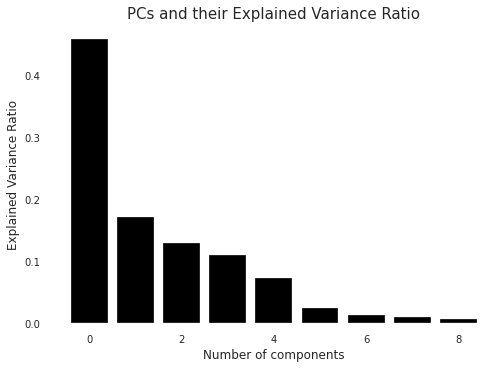

In [ ]:
#Plot explained variance ratio for each PC
plt.bar([i for i, _ in enumerate(var)],var,color='black')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)

We can see, the variance explained by first and second principal components are nearly 46% and 17% respectively. We can now count cumulative variance explained by them. For convenience of observation, we are converting the figures to percentages here.

In [ ]:
#Cumulative Variance explained by each PC
import numpy as np
cum_var = np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
print(cum_var)

[45.95 63.13 76.13 87.18 94.52 97.   98.26 99.24 99.98]


Using these cumulative variance ratios for all PCs, we will now draw a scree plot. It is used to determine the number of principal components to keep in this principal component analysis.

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

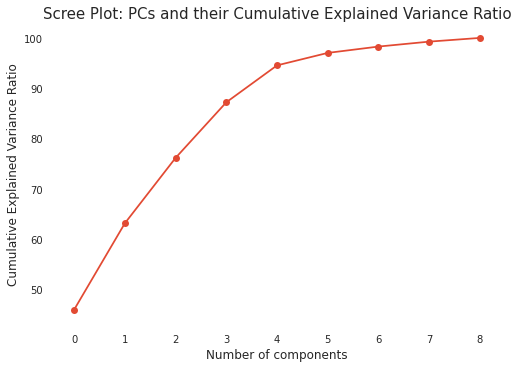

In [ ]:
# Scree Plot
plt.plot(cum_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

The plot indicates the threshold of 90% is getting crossed at PC = 4. Ideally, we can keep 4 (or atmost 5) components here. Before PC = 5, the plot is following an upward trend. After crossing 5, it is almost steady. However, we have retailed all 9 PCs here to get the full data in results. And for visualization purpose in 2-D figure, we have plotted only PC1 vs PC2.

In [ ]:
#Principal Component Data Decomposition
colnames = list(data.columns)
pca_data = pd.DataFrame({ 'Features':colnames,'PC1':pc.components_[0],'PC2':pc.components_[1],'PC3':pc.components_[2],
                          'PC4':pc.components_[3],'PC5':pc.components_[4], 'PC6':pc.components_[5], 'PC7':pc.components_[6], 
                          'PC8':pc.components_[7], 'PC9':pc.components_[8]})
pca_data

Features       PC1       PC2       PC3       PC4       PC5       PC6  \
0  child_mort -0.419519  0.192884 -0.029544  0.370653 -0.168970  0.200628   
1     exports  0.283897  0.613163  0.144761  0.003091  0.057616 -0.059333   
2      health  0.150838 -0.243087 -0.596632  0.461897  0.518000  0.007276   
3     imports  0.161482  0.671821 -0.299927 -0.071907  0.255376 -0.030032   
4      income  0.398441  0.022536  0.301548  0.392159 -0.247150  0.160347   
5   inflation -0.193173 -0.008404  0.642520  0.150442  0.714869  0.066285   
6  life_expec  0.425839 -0.222707  0.113919 -0.203797  0.108220 -0.601127   
7   total_fer -0.403729  0.155233  0.019549  0.378304 -0.135262 -0.750689   
8        gdpp  0.392645 -0.046022  0.122977  0.531995 -0.180167  0.016779   

        PC7       PC8       PC9  
0 -0.079489 -0.682743  0.327542  
1 -0.707303 -0.014197 -0.123082  
2 -0.249831  0.072497  0.113088  
3  0.592190 -0.028946  0.099037  
4  0.095562  0.352624  0.612982  
5  0.104633 -0.011538 -0.025236  
6  0.018486 -0.504664  0.294040  
7  0.028826  0.293353 -0.026336  
8  0.242998 -0.249696 -0.625646

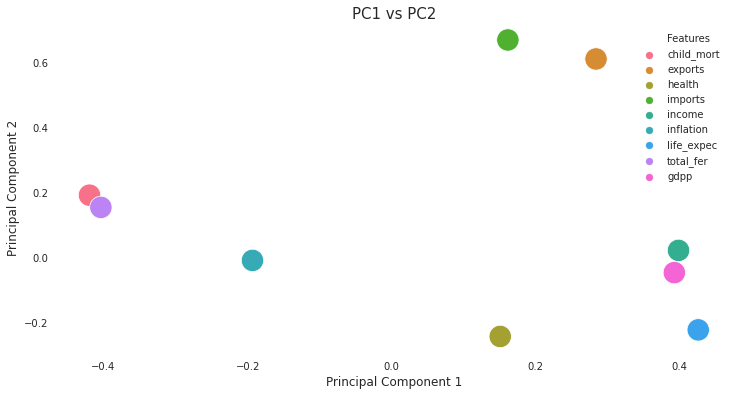

In [ ]:
#Visualize 2 main PCs
fig = plt.figure(figsize = (12,6))
sns.scatterplot(pca_data.PC1, pca_data.PC2,hue=pca_data.Features,marker='o', s=500)
plt.title('PC1 vs PC2',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.show()

We can see that 1st Principal Component (X-axis) is gravitated mainly towards features like: life expectancy, gdpp, income. 2nd Principal Component (Y-axis) is gravitated predominantly towards features like: imports, exports.

In [ ]:
#Export PCA results to file
pca_data.to_csv("PCA_results.csv", index=False)

# (2) K-Means Clustering

This is the most popular method of clustering. It uses Euclidean distance between clusters in each iteration to decide a data point should belong to which cluster, and proceed accordingly. To decide how many no. of clusters to consider, we can employ several methods. The basic and most widely used method is **Elbow Curve**.

**Method-1: Plotting Elbow Curve**

In this curve, wherever we observe a "knee" like bent, we can take that number as the ideal no. of clusters to consider in K-Means algorithm.

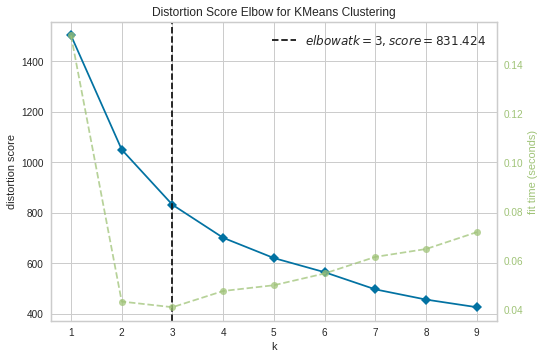

In [ ]:
#Plotting Elbow Curve
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scaled)    
visualizer.poof()

Here, along Y-axis, "distortion" is defined as "the sum of the squared differences between the observations and the corresponding centroid". It is same as WCSS (Within-Cluster-Sum-of-Squares).

Let's see the centroids of the clusters. Afterwards, we will fit our scaled data into a K-Means model having 3 clusters, and then label each data point (each record) to one of these 3 clusters.

In [ ]:
#Fitting data into K-Means model with 3 clusters
km_3=KMeans(n_clusters=3,random_state=12345)
km_3.fit(data_scaled)
print(km_3.cluster_centers_)

[[-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]]


In [ ]:
print(km_3.labels_)

[1 0 0 1 0 0 0 2 2 0 0 2 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 2 2 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


We can see each record has got a label among 0,1,2. This label is each of their cluster_id i.e. in which cluster they belong to. We can count the records in each cluster now.

In [ ]:
pd.Series(km_3.labels_).value_counts()

0    84
1    47
2    36
dtype: int64

We see, the highest no. of records belong to the first cluster.

Now, we are interested to check how good is our K-Means clustering model. Silhouette Coefficient is one such metric to check that. The **Silhouette Coefficient** is calculated using: 
* the mean intra-cluster distance ( a ) for each sample
* the mean nearest-cluster distance ( b ) for each sample
* The Silhouette Coefficient for a sample is (b - a) / max(a, b)

In [ ]:
# calculate Silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(data_scaled, km_3.labels_)

0.28329575683463126

In [ ]:
# calculate SC for K=2 through K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=12345)
    km.fit(data_scaled)
    scores.append(metrics.silhouette_score(data_scaled, km.labels_))

We can check **Silhouette Scores** for K-Means model with different no. of clusters

In [ ]:
print(scores)

[0.2873566892140671, 0.28329575683463126, 0.301375962376881, 0.30088229124112015, 0.22514525980338546, 0.20688602024745156, 0.22219890556988897, 0.21638564099423846]


We observe the highest silhouette score with no. of clusters 3 and 4. However, from Elbow Curve, we got to see the "knee" like bent at no. of clusters 3. So we will do further analysis to choose the ideal no. of clusters between 3 and 4.

For further analysis, we will consider **Davies-Bouldin Score** apart from Silhouette Score. **Davies-Bouldin Score** is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

We will also analyze **SSE (Sum of Squared Errors)**. SSE is the sum of the squared differences between each observation and its cluster's mean. It can be used as a measure of variation within a cluster. If all cases within a cluster are identical the SSE would then be equal to 0. The formula for SSE is: 1

**Method-2: Plotting of SSE, Davies-Bouldin Scores, Silhouette Scores to Decide Ideal No. of Clusters**

In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
sse,db,slc = {}, {}, {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=12345).fit(data_scaled)
    if k == 4: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(data_scaled,clusters)
    slc[k] = silhouette_score(data_scaled,clusters)

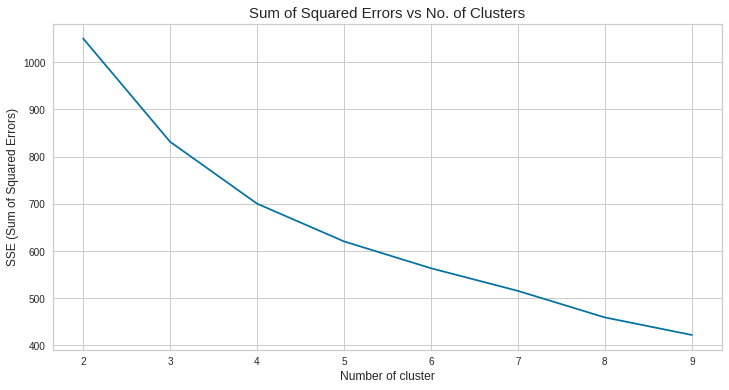

In [ ]:
#Plotting SSE
plt.figure(figsize=(12,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("SSE (Sum of Squared Errors)", fontsize=12)
plt.title("Sum of Squared Errors vs No. of Clusters", fontsize=15)
plt.show()

We can see "knee" like bent at both 3 and 4, still considering no. of clusters = 4 seems a better choice, because after 4, there is no further "knee" like bent observed. Still, we will analyse further to decide between 3 and 4.

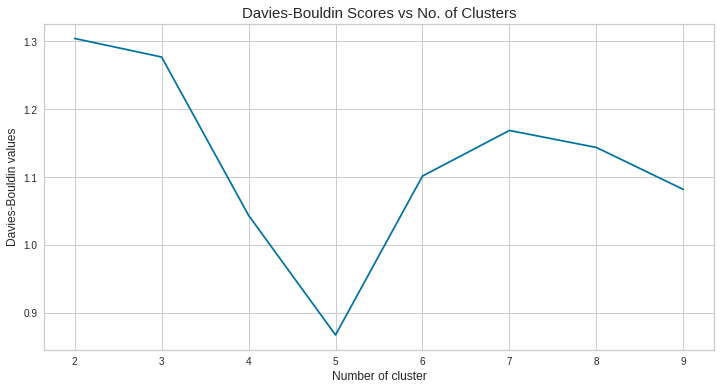

In [ ]:
#Plotting Davies-Bouldin Scores
plt.figure(figsize=(12,6))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

Clearly, no. of clusters = 3 is the best choice here.

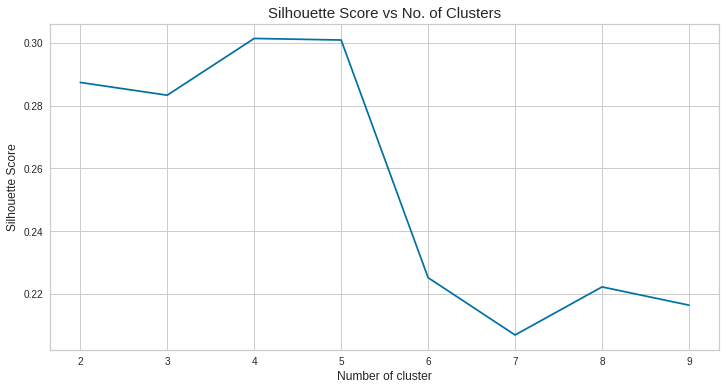

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Score vs No. of Clusters", fontsize=15)
plt.show()

No. of clusters = 3 seems the best choice here as well. The silhouette score ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A score nearly 0.28 seems a good one.

* **Silhouette Plots for Different No. of Clusters :**
We will now draw Silhouette Plots for different no. of clusters for getting more insights. Side by side, we will observe the shape of the clusters in 2-dimensional figure.

For n_clusters = 2 The average silhouette_score is : 0.2873566892140671
For n_clusters = 3 The average silhouette_score is : 0.28329575683463126
For n_clusters = 4 The average silhouette_score is : 0.301375962376881
For n_clusters = 5 The average silhouette_score is : 0.30088229124112015
For n_clusters = 6 The average silhouette_score is : 0.22514525980338546
For n_clusters = 7 The average silhouette_score is : 0.20688602024745156
For n_clusters = 8 The average silhouette_score is : 0.22219890556988897
For n_clusters = 9 The average silhouette_score is : 0.21638564099423846


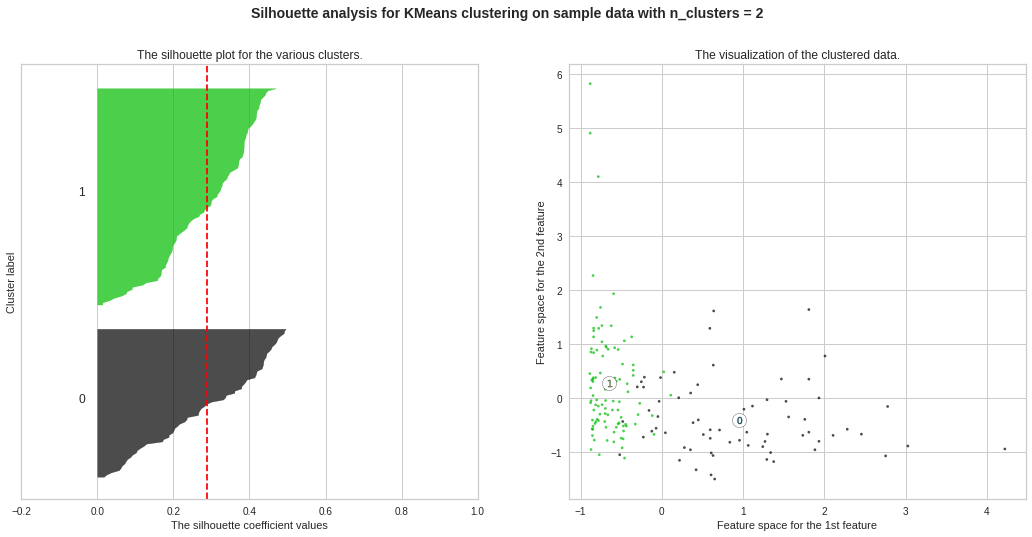

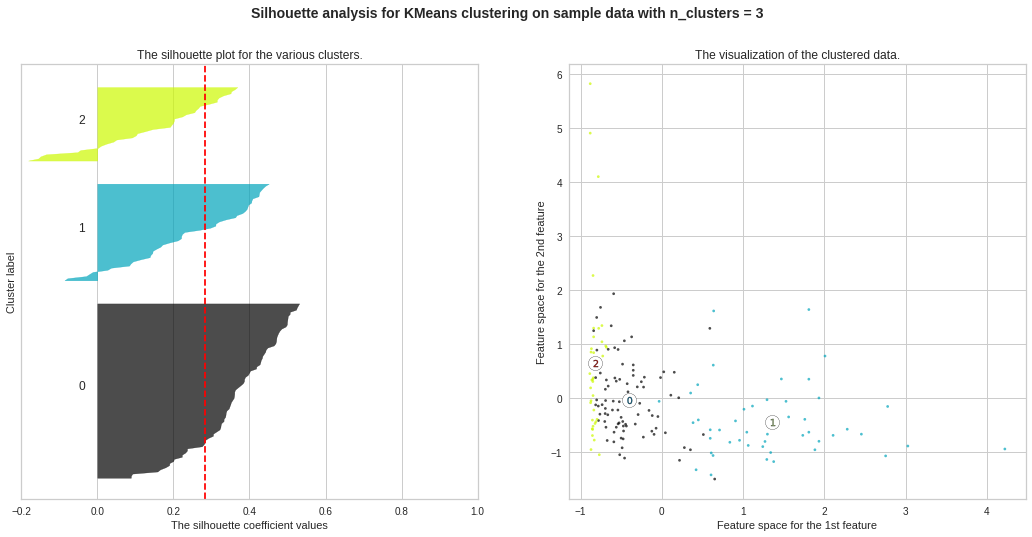

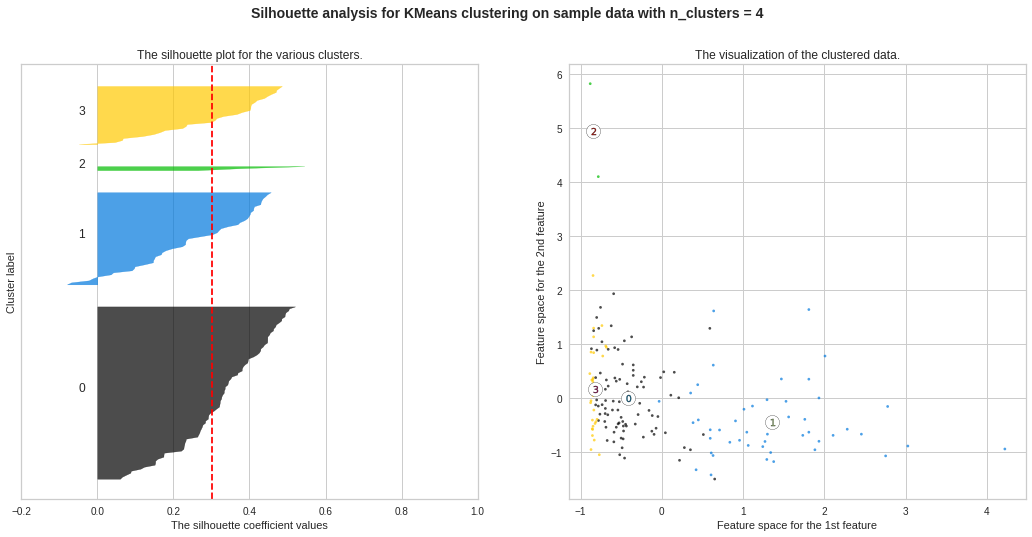

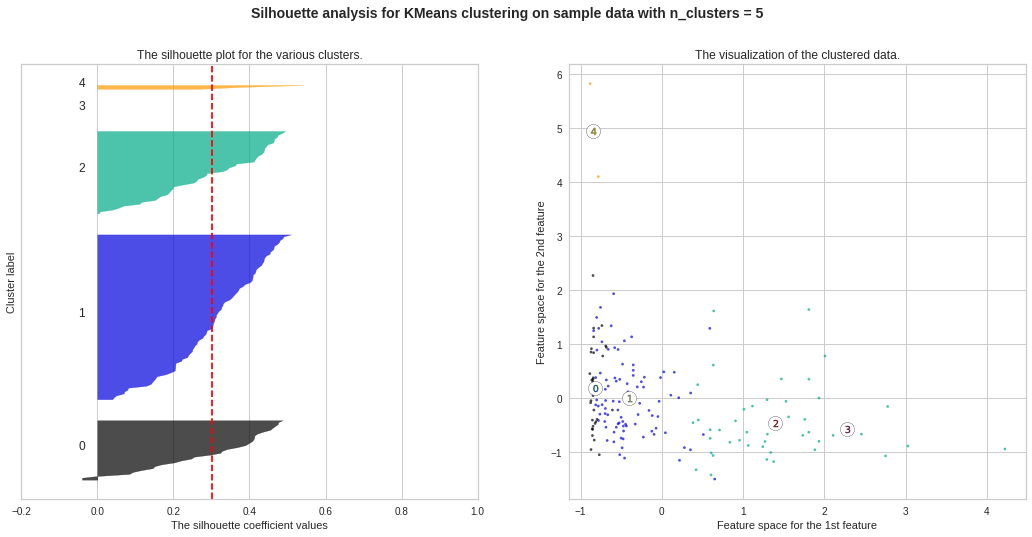

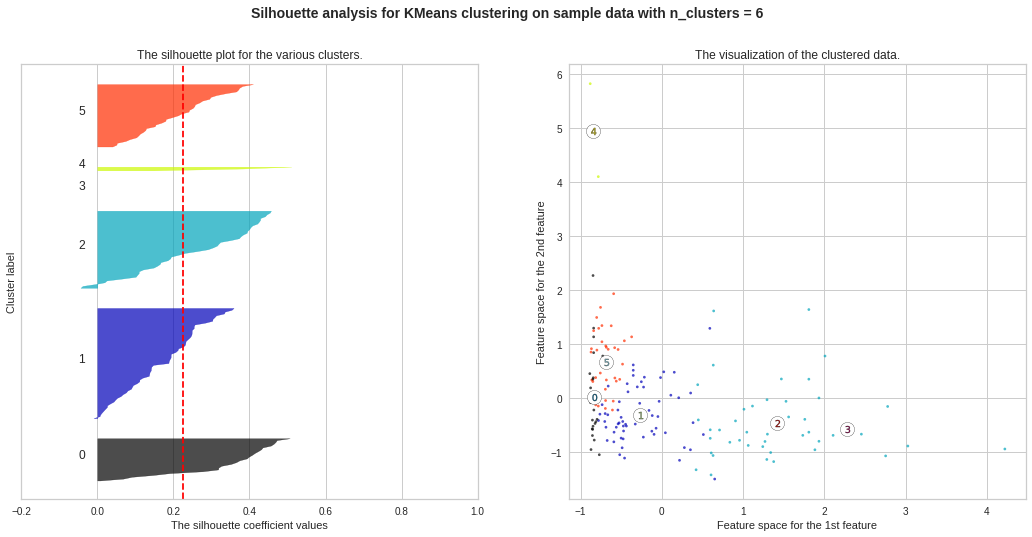

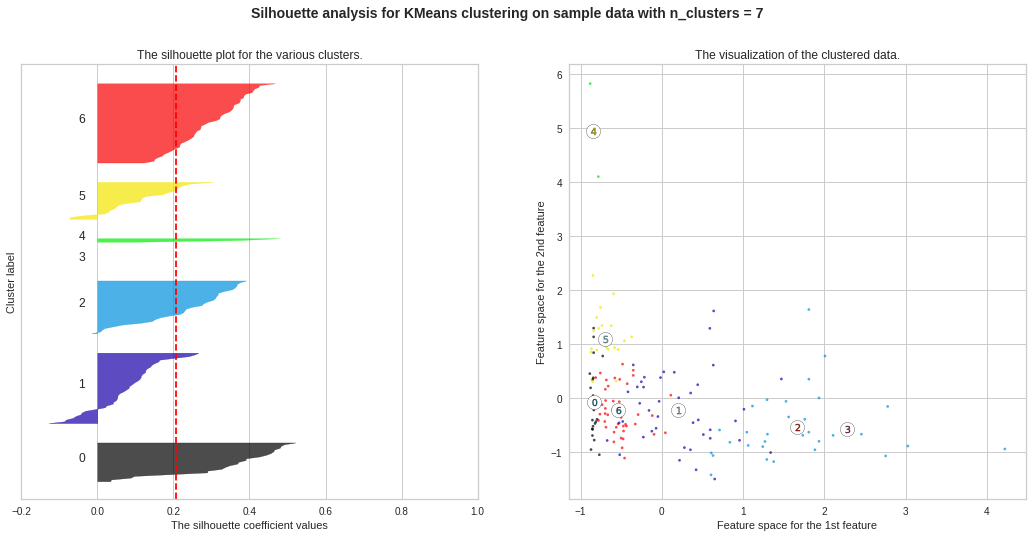

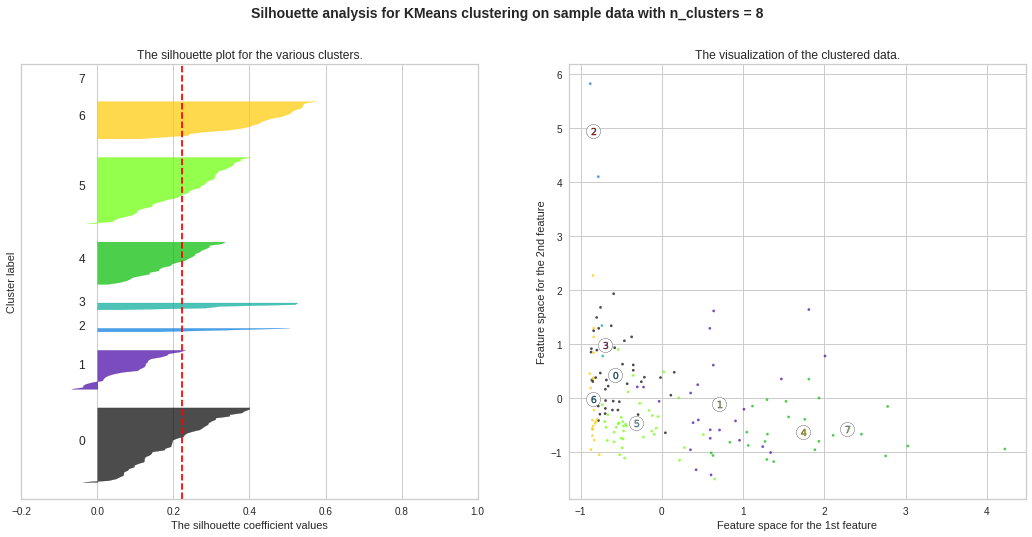

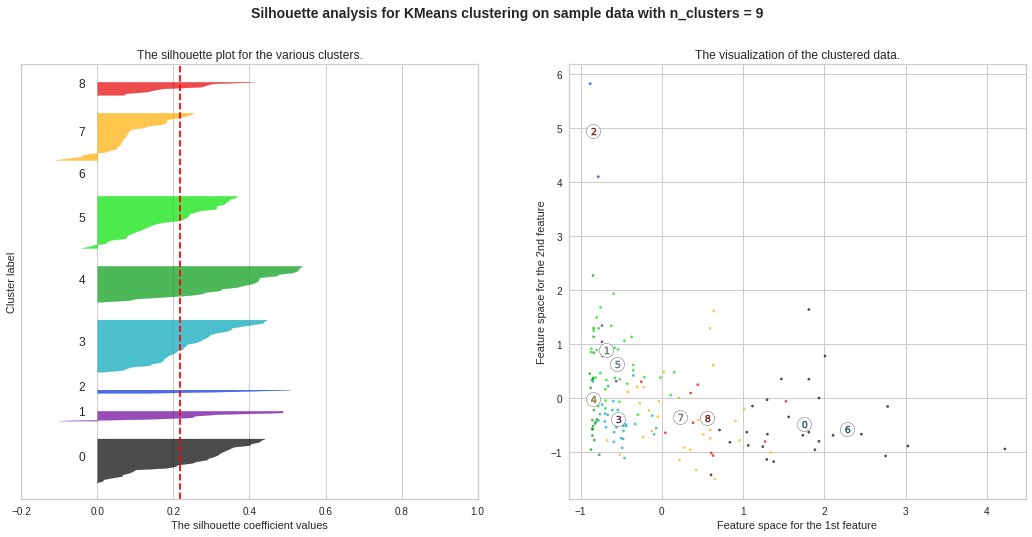

In [ ]:
#Silhouette Plots for Different No. of Clusters
import matplotlib.cm as cm
import numpy as np
for n_clusters in range(2, 10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 8)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but here the range is from -0.2 till 1
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator seed of 12345 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=12345)
    cluster_labels = clusterer.fit_predict(data_scaled)
    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

We get a very prominent silhouette plot for no. of clusters = 3. We recall the KMeans model we fitted earlier on our scaled country data with 3 clusters (km_3). We will use that model again to label each record of our data set with a particular cluster_id.

In [ ]:
cluster_labels = km_3.fit_predict(data_scaled)

Now, we will see data with labels (cluster_ids labelled).

In [ ]:
preds = km_3.labels_
data_df = pd.DataFrame(data)
data_df['KM_Clusters'] = preds
data_df.head(10)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610      9.440        56.2   
1        16.6     28.0    6.55     48.6    9930      4.490        76.3   
2        27.3     38.4    4.17     31.4   12900     16.100        76.5   
3       119.0     62.3    2.85     42.9    5900     22.400        60.1   
4        10.3     45.5    6.03     58.9   19100      1.440        76.8   
5        14.5     18.9    8.10     16.0   18700     20.900        75.8   
6        18.1     20.8    4.40     45.3    6700      7.770        73.3   
7         4.8     19.8    8.73     20.9   41400      1.160        82.0   
8         4.3     51.3   11.00     47.8   43200      0.873        80.5   
9        39.2     54.3    5.88     20.7   16000     13.800        69.1   

   total_fer   gdpp  KM_Clusters  
0       5.82    553            1  
1       1.65   4090            0  
2       2.89   4460            0  
3       6.16   3530            1  
4       2.13  12200            0  
5       2.37  10300            0  
6       1.69   3220            0  
7       1.93  51900            2  
8       1.44  46900            2  
9       1.92   5840            0

We will visualize 3 clusters now for various pairs of features. Initially, I chose the pairs randomly. Later, I chose the pairs including "GDPP", "income", "inflation" etc. important features. Since we are concerned about analyzing country profiles and "GDPP" is the main indicator to represent a country's status, we are concerned with that mainly.

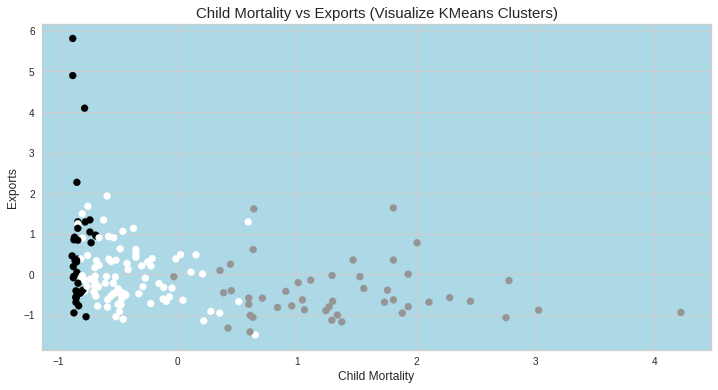

In [ ]:
#Visualize clusters: Feature Pair-1
import matplotlib.pyplot as plt_1
plt_1.rcParams['axes.facecolor'] = 'lightblue'
plt_1.figure(figsize=(12,6))
plt_1.scatter(data_scaled[:,0],data_scaled[:,1],c=cluster_labels) #child mortality vs exports
plt_1.title("Child Mortality vs Exports (Visualize KMeans Clusters)", fontsize=15)
plt_1.xlabel("Child Mortality", fontsize=12)
plt_1.ylabel("Exports", fontsize=12)
plt_1.rcParams['axes.facecolor'] = 'lightblue'
plt_1.show()

Well, we are more interested to dive deep into GDPP of the countries. So we can proceed with plotting "Income" vs "GDPP"; "Inflation" vs "GDPP" next.

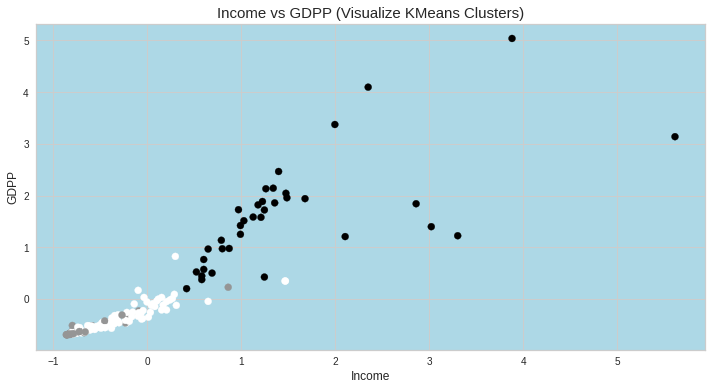

In [ ]:
#Visualize clusters: Feature Pair-2
plt_1.figure(figsize=(12,6))
plt_1.scatter(data_scaled[:,4],data_scaled[:,8],c=cluster_labels) # income vs gdpp
plt_1.title("Income vs GDPP (Visualize KMeans Clusters)", fontsize=15)
plt_1.xlabel("Income", fontsize=12)
plt_1.ylabel("GDPP", fontsize=12)
plt_1.rcParams['axes.facecolor'] = 'lightblue'
plt_1.show()

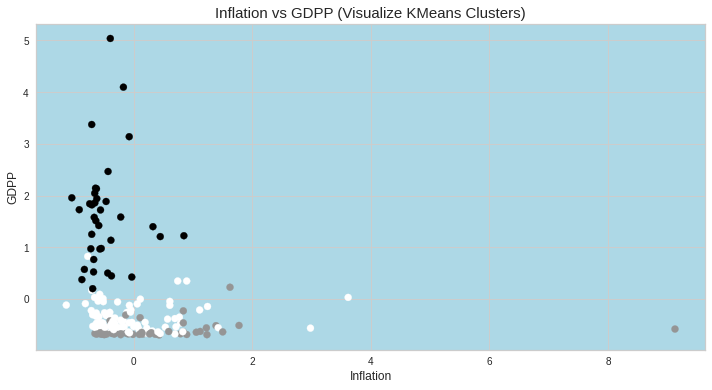

In [ ]:
#Visualize clusters: Feature Pair-3
plt_1.figure(figsize=(12,6))
plt_1.scatter(data_scaled[:,5],data_scaled[:,8],c=cluster_labels) # inflation vs gdpp
plt_1.title("Inflation vs GDPP (Visualize KMeans Clusters)", fontsize=15)
plt_1.xlabel("Inflation", fontsize=12)
plt_1.ylabel("GDPP", fontsize=12)
plt_1.rcParams['axes.facecolor'] = 'lightblue'
plt_1.show()

In [ ]:
#Export KMeans results to file
data_df.to_csv("KMeans_results.csv", index=False)

# (3) Hierarchical Clustering

There are two types of hierarchical clustering: **Divisive** and **Agglomerative**. In divisive (top-down) clustering method, all observations are assigned to a single cluster and then that cluster is partitioned to two least similar clusters, and then those two clusters are partitioned again to multiple clusters, and thus the process go on. In agglomerative (bottom-up), the opposite approach is followed. Here, the ideal no. of clusters is decided by **dendrogram**.

* **Method-1: Dendrogram Plotting using Clustermap**

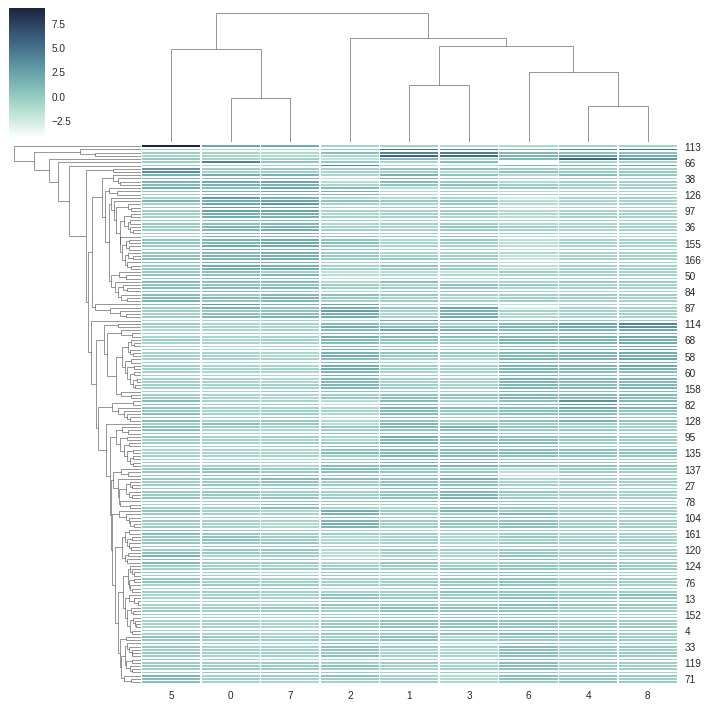

In [ ]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(data_scaled, cmap=cmap, linewidths=.5)

From above dendrogram, we can consider 2 clusters at minimum or 6 clusters at maximum. We will again cross-check the dendrogram using **Ward's Method**. Ward's method is an alternative to single-link clustering. This algorithm works for finding a partition with small sum of squares (to minimise the within-cluster-variance).

* **Method-2: Dendrogram Plotting using Ward's Method**

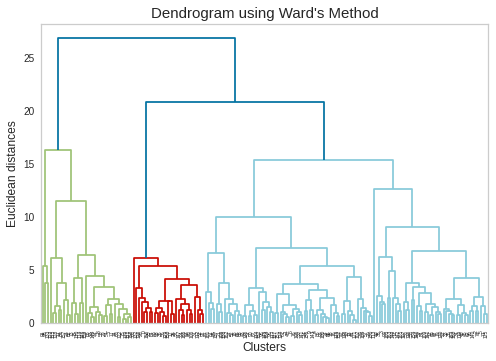

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Dendrogram using Ward's Method", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Euclidean distances', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.show()

We can see 3 prominent clusters here (green, red, skyblue). We will now follow the similar process of labelling data with cluster ids, then visualize the 3 clusters using various feature pairs, and finally we will export the results to a .csv file.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(data_scaled)

In [ ]:
Y_hc

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2])

In [ ]:
hcpreds = hc.labels_
data_hc_df = data.drop('KM_Clusters', axis=1)
data_hc_df['Hier_Clusters'] = hcpreds
data_hc_df.head(10)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610      9.440        56.2   
1        16.6     28.0    6.55     48.6    9930      4.490        76.3   
2        27.3     38.4    4.17     31.4   12900     16.100        76.5   
3       119.0     62.3    2.85     42.9    5900     22.400        60.1   
4        10.3     45.5    6.03     58.9   19100      1.440        76.8   
5        14.5     18.9    8.10     16.0   18700     20.900        75.8   
6        18.1     20.8    4.40     45.3    6700      7.770        73.3   
7         4.8     19.8    8.73     20.9   41400      1.160        82.0   
8         4.3     51.3   11.00     47.8   43200      0.873        80.5   
9        39.2     54.3    5.88     20.7   16000     13.800        69.1   

   total_fer   gdpp  Hier_Clusters  
0       5.82    553              2  
1       1.65   4090              1  
2       2.89   4460              1  
3       6.16   3530              1  
4       2.13  12200              1  
5       2.37  10300              1  
6       1.69   3220              1  
7       1.93  51900              0  
8       1.44  46900              0  
9       1.92   5840              1

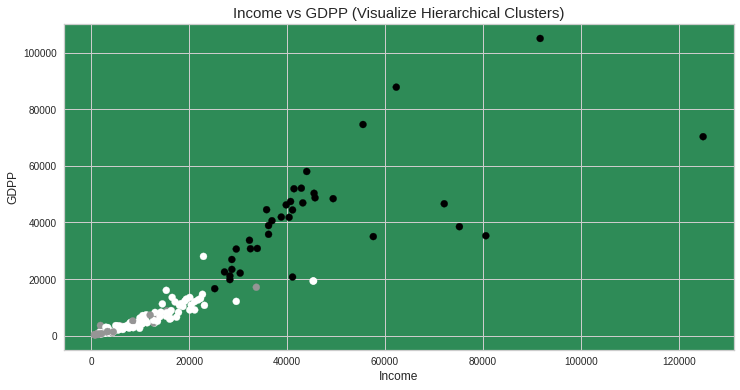

In [ ]:
#Visualize clusters: Random Feature Pair-1 (income vs gdpp)
import matplotlib.pyplot as plt_2
plt_2.rcParams['axes.facecolor'] = 'seagreen'
plt_2.rcParams['axes.grid'] = True
plt_2.figure(figsize=(12,6))
#datahc_df = pd.DataFrame(data_hc_df)
plt_2.scatter(data_hc_df['income'],data_hc_df['gdpp'],c=cluster_labels) 
plt_2.title('Income vs GDPP (Visualize Hierarchical Clusters)', fontsize=15)
plt_2.xlabel("Income", fontsize=12)
plt_2.ylabel("GDPP", fontsize=12)
plt_2.rcParams['axes.facecolor'] = 'seagreen'
plt_2.rcParams['axes.grid'] = True
plt_2.show()

The plot looks similar to what we had got earlier for the KMeans. Observing minutely both KMeans clustering's "Income vs GDPP" plot and hierarchical clustering's "Income vs GDPP" plot, we can detect the difference in assigning cluster labels for a few data points though.

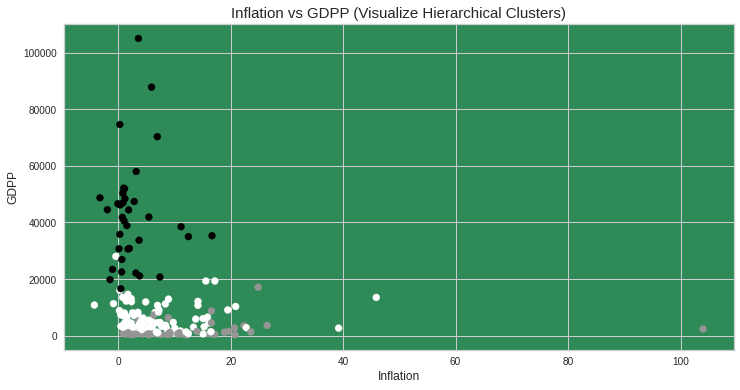

In [ ]:
#Visualize clusters: Random Feature Pair-2 (inflation vs gdpp)
plt_2.figure(figsize=(12,6))
plt_2.scatter(data_hc_df['inflation'],data_hc_df['gdpp'],c=cluster_labels) 
plt_2.title('Inflation vs GDPP (Visualize Hierarchical Clusters)', fontsize=15)
plt_2.xlabel("Inflation", fontsize=12)
plt_2.ylabel("GDPP", fontsize=12)
plt_2.rcParams['axes.facecolor'] = 'seagreen'
plt_2.show()

For this pair, the plot looks similar to what we had got earlier for the KMeans. Also, observing minutely both KMeans clustering's "Inflation vs GDPP" plot and hierarchical clustering's "Inflation vs GDPP" plot, we find almost no difference in assigning cluster labels for all data points.

In [ ]:
#Export hierarchical clustering results
data_hc_df.to_csv('Hierchical_Results.csv', index=False)

# (4) DBSCAN Clustering

DBSCAN is an abbreviation of "Density-based spatial clustering of applications with noise". This algorithm groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks noise as outliers (noise means the points which are in low-density regions).

**I found an interesting result with DBSCAN when I used all features of country data. It gave me a single cluster.** I presume, that was very evident to happen because our data is almost evenly spread, so density wise, this algorithm could not bifurcate the datapoints into more than one cluster. Hence, I used only the features which have high correlation with "GDPP". I also kept "Child Mortality" and "Total Fertility" in my working dataset since they have polarizations - some data points have extremely high values, some have extremely low values (ref. to corresponding scatter plots in data profiling section in the beginning).

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=3).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
#data['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
print(data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].head())

# number of labels
print("number of labels: ", set(labels))

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  
number of labels:  {0, 1, 2, 3, 4, 5, -1}


We have got 7 clusters using density based clustering which is a distinct observation (7 is much higher than 3 which we got in all three different clustering algorithms we used earlier).

In [ ]:
db.labels_

array([ 0,  1, -1, -1,  1, -1,  1,  2,  2, -1,  1, -1, -1,  1, -1, -1,  1,
        3,  1,  1,  1, -1,  1, -1,  1,  3, -1,  1,  3,  2,  1, -1,  5,  1,
        1,  1,  4, -1, -1,  1,  0,  1,  1,  1,  2,  1,  1,  1,  1, -1, -1,
        1,  1,  2,  2, -1,  4,  1,  2, -1,  2,  1,  1,  0,  3,  1, -1,  1,
        2, -1, -1,  1, -1, -1, -1,  2,  1,  2, -1, -1,  4, -1, -1,  1, -1,
        1,  1, -1, -1, -1,  1, -1,  1,  4,  0, -1,  1,  5, -1, -1,  1, -1,
       -1, -1,  1,  1,  0, -1, -1, -1, -1,  2,  5, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  2, -1,  1,  1, -1, -1, -1,  4,  1, -1, -1, -1,  1,  1,
       -1, -1,  1,  2, -1,  1, -1,  1,  2, -1, -1,  0, -1, -1, -1, -1,  1,
        1, -1,  0, -1, -1,  2, -1,  1, -1,  1, -1, -1, -1,  0])

In [ ]:
pd.Series(db.labels_).value_counts()

-1    72
 1    59
 2    16
 0     8
 4     5
 3     4
 5     3
dtype: int64

We can spot that 78.44% data points have been labelled to the 1st and 2nd clusters.

In [ ]:
# save the cluster labels and sort by cluster
datacopy = data.copy()
datacopy = datacopy.drop('KM_Clusters', axis=1)
datacopy['DB_cluster'] = db.labels_

In [ ]:
# review the cluster centers
datacopy.groupby('DB_cluster').mean()

child_mort    exports     health    imports        income  \
DB_cluster                                                              
-1           46.255556  47.222208   6.458889  50.771749  19736.819444   
 0           92.212500  27.250000   6.315000  37.637500   1793.500000   
 1           17.598305  41.357627   6.705593  48.840678  13724.237288   
 2            4.125000  33.393750  10.219375  32.775000  37312.500000   
 3          112.250000  20.025000   6.117500  32.250000   1825.000000   
 4           71.940000  22.180000   4.876000  42.260000   1824.000000   
 5          136.666667  27.266667   4.890000  42.566667   1538.000000   

            inflation  life_expec  total_fer          gdpp  
DB_cluster                                                  
-1          12.471653   68.591667   3.209861  13849.277778  
 0          10.565000   55.775000   5.535000    757.000000  
 1           4.209559   74.161017   2.082881   8358.576271  
 2           1.371125   81.006250   1.720000  41237.500000  
 3           3.143750   58.150000   5.347500    797.500000  
 4           4.180000   63.800000   4.898000    742.200000  
 5           4.436667   58.266667   6.876667    651.000000

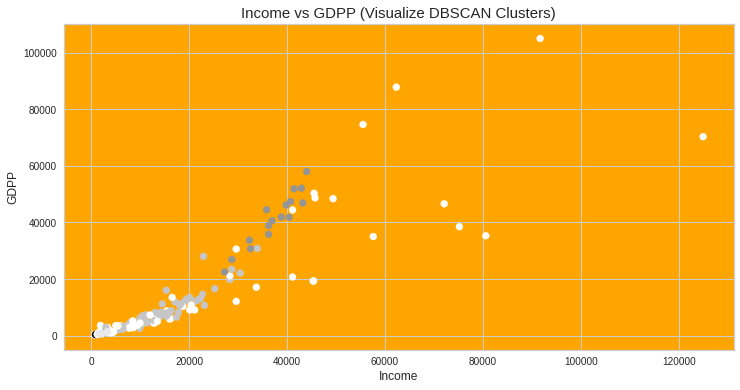

In [ ]:
#Visualize clusters: Random Feature Pair-1 (income vs gdpp)
import matplotlib.pyplot as plt_3
plt_3.rcParams['axes.facecolor'] = 'orange'
plt_3.figure(figsize=(12,6))
plt_3.scatter(datacopy['income'],datacopy['gdpp'],c=db.labels_) 
plt_3.title('Income vs GDPP (Visualize DBSCAN Clusters)', fontsize=15)
plt_3.xlabel("Income", fontsize=12)
plt_3.ylabel("GDPP", fontsize=12)
plt_3.rcParams['axes.facecolor'] = 'orange'
plt_3.show()

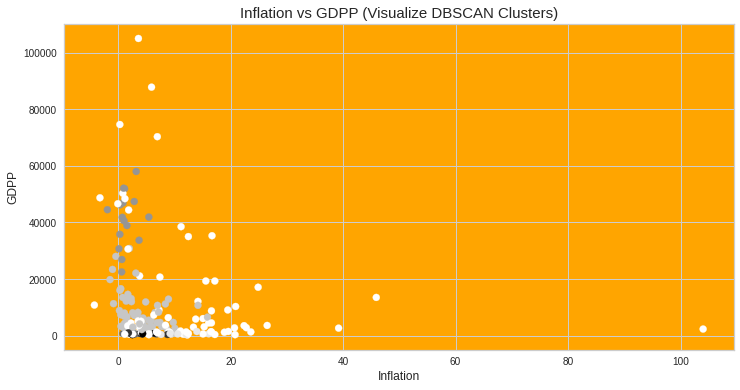

In [ ]:
#Visualize clusters: Random Feature Pair-2 (inflation vs gdpp)
import matplotlib.pyplot as plt_3
plt_3.figure(figsize=(12,6))
plt_3.scatter(datacopy['inflation'],datacopy['gdpp'],c=db.labels_) 
plt_3.title('Inflation vs GDPP (Visualize DBSCAN Clusters)', fontsize=15)
plt_3.xlabel("Inflation", fontsize=12)
plt_3.ylabel("GDPP", fontsize=12)
plt_3.rcParams['axes.facecolor'] = 'orange'
plt_3.show()

In both of the above plots, we can well observe the prevalence of two clusters (1st and 2nd) only.

In [ ]:
#Data with labelled cluster_ids
datacopy.head(10)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610      9.440        56.2   
1        16.6     28.0    6.55     48.6    9930      4.490        76.3   
2        27.3     38.4    4.17     31.4   12900     16.100        76.5   
3       119.0     62.3    2.85     42.9    5900     22.400        60.1   
4        10.3     45.5    6.03     58.9   19100      1.440        76.8   
5        14.5     18.9    8.10     16.0   18700     20.900        75.8   
6        18.1     20.8    4.40     45.3    6700      7.770        73.3   
7         4.8     19.8    8.73     20.9   41400      1.160        82.0   
8         4.3     51.3   11.00     47.8   43200      0.873        80.5   
9        39.2     54.3    5.88     20.7   16000     13.800        69.1   

   total_fer   gdpp  DB_cluster  
0       5.82    553           0  
1       1.65   4090           1  
2       2.89   4460          -1  
3       6.16   3530          -1  
4       2.13  12200           1  
5       2.37  10300          -1  
6       1.69   3220           1  
7       1.93  51900           2  
8       1.44  46900           2  
9       1.92   5840          -1

In [ ]:
#Export DBSCAN results
datacopy.to_csv('DBSCAN_results.csv', index=False)